In [1]:
import collections
import numpy as np
import pickle
import time
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.tensorboard.writer import SummaryWriter
from PIL import Image

C:\Users\BBA\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_masked\__init__.py:223: UserWarning: Failed to initialize NumPy: module compiled against API version 0xf but this version of numpy is 0xe (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  example_input = torch.tensor([[-3, -2, -1], [0, 1, 2]])


In [2]:
with open('ugroup2', 'rb') as f:
    audio_data = pickle.load(f)

In [2]:
with open('tgroup1', 'rb') as f:
    audio_data = pickle.load(f)

In [224]:
num = 0
genre = []
while True:
    if audio_data[num][1] == 8:
        genre.append(audio_data[num][0])
    num += 1
    if len(genre) >= 400:
        break
genre = np.array(genre, dtype=np.int16) * 128

In [ ]:
np.random.shuffle(genre)
fig, axs = plt.subplots(12, 8, sharex=True, sharey=True)
fig.set_size_inches(36, 36)

for x in range(12):
    for y in range(8):
        axs[x][y].imshow(genre[x*y], aspect='auto')


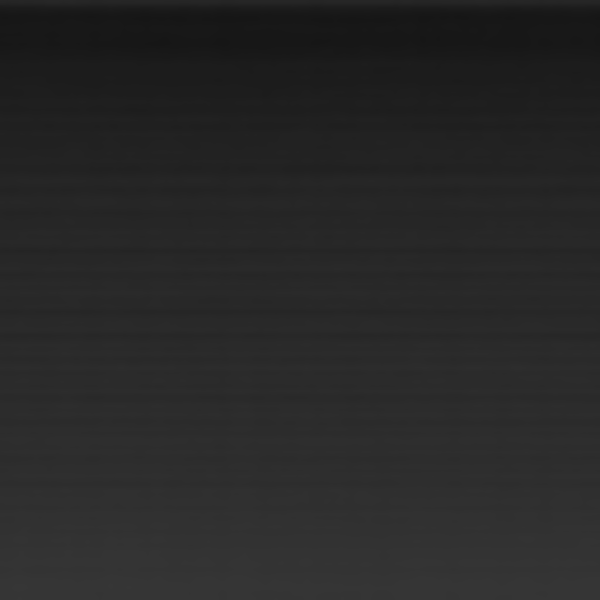

In [225]:
avgenre = np.mean(genre, axis=0)
eigenre = np.array([(x - avgenre).flatten() for x in genre])
u, s, vt = np.linalg.svd(eigenre, full_matrices=False)

display(Image.fromarray(np.int16(avgenre)).resize((600, 600)))

In [232]:
np.array([u[0], vt[0]])

C:\Users\BBA\AppData\Local\Temp\ipykernel_8120\1505640273.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([u[0], vt[0]]).shape


(2,)

In [233]:
genre.shape

(400, 128, 128)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(36, 36)
ax.imshow(np.reshape(u[:, 0], (128, 128)).T)

In [6]:
items = list(os.listdir(r'C:\Users\BBA\Coding\Audio\Classification\test'))

In [14]:
for x in items:
    if x not in labels:
        print(x)


In [65]:
with open('train_labels', 'rt') as f:
    labels = f.readlines()
labels = [x.split(',') for x in labels]
labels = {x[1]: int(x[3]) for x in labels}
group = [x[0] for x in labels.items() if x[1] == 7]

In [21]:
song, sr = librosa.load(f'test/{np.random.choice(items)}', sr=None)
print(sr)

44100


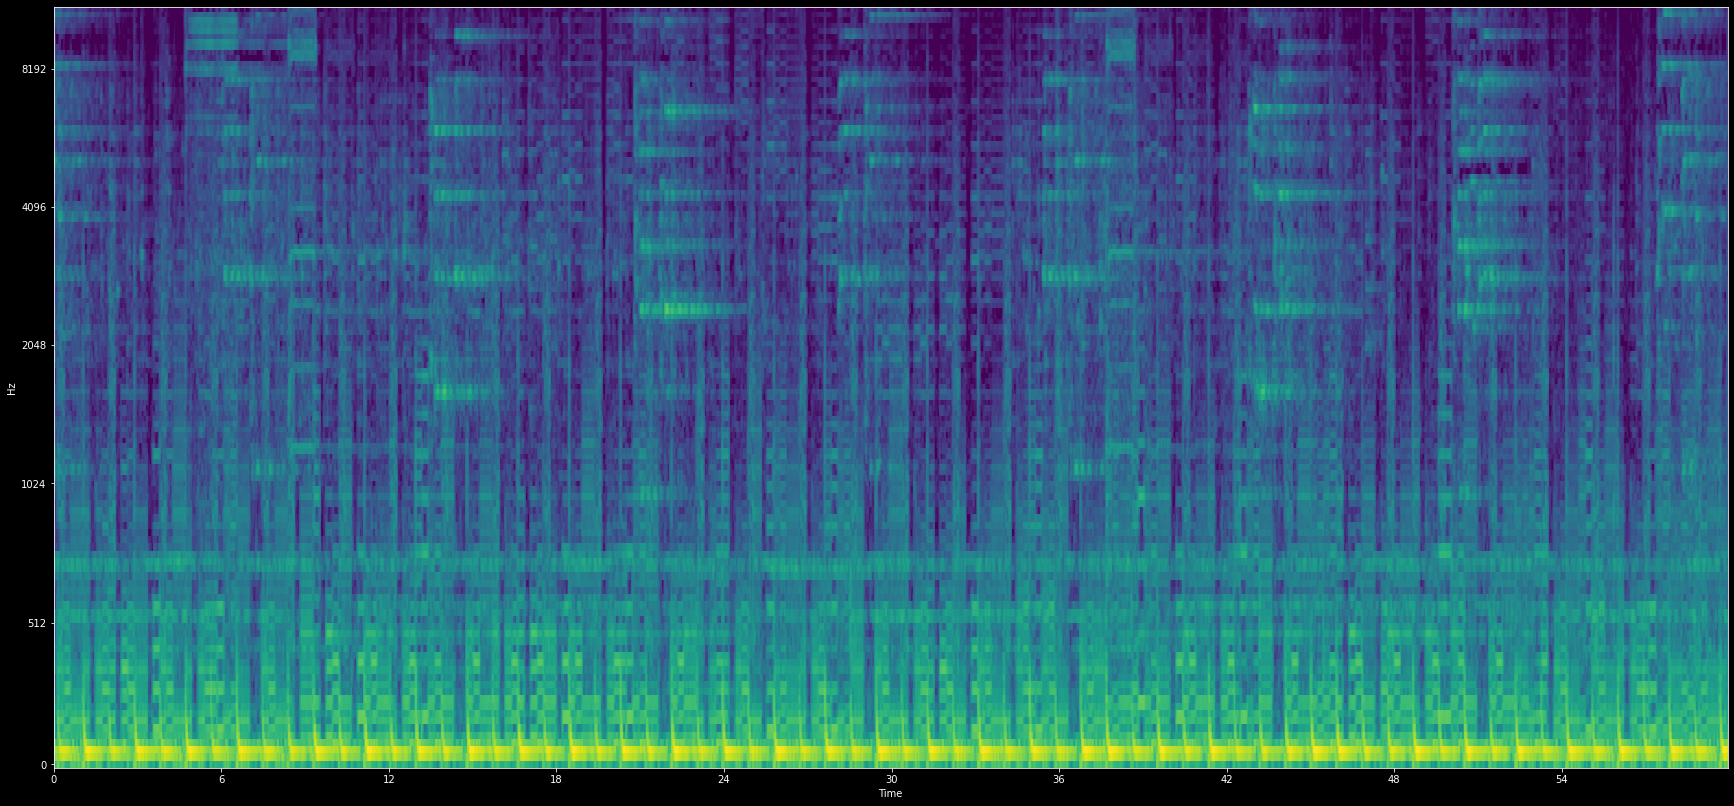

In [22]:
scale = sr / 22050
msgram = librosa.feature.melspectrogram(y=song, sr=sr, fmax=4096,  n_fft=int(2048 * scale))
dbmsgram = librosa.power_to_db(msgram, ref=np.max)


fig = plt.figure(figsize=(30, 14))
ax = plt.axes()
librosa.display.specshow(dbmsgram, y_axis='mel', x_axis='time', ax=ax, cmap='viridis')
plt.show()


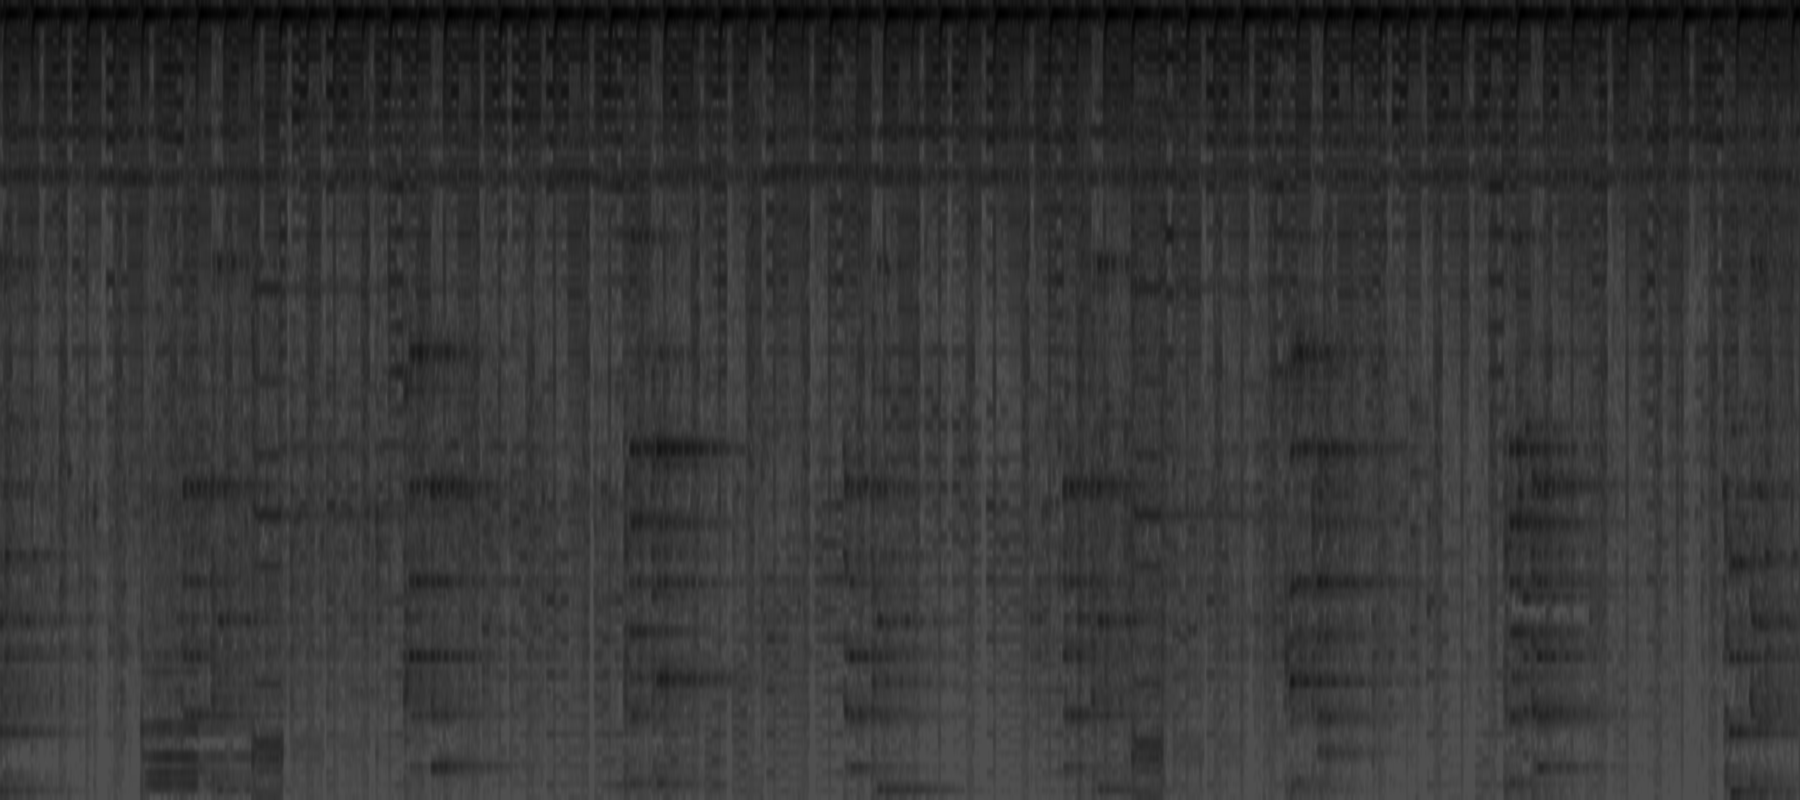

In [23]:
display(Image.fromarray(np.uint8(np.abs(dbmsgram))).resize((1800, 800)))